<div class="frontmatter text-center">
<h2> MATH5027 Scientific Python, Fall 2017</h2>
<h2> Homework 3, Due: Tuesday October 10th, 3pm </h2>
</div>

Instructions: complete the selection of exercises from the week's class notebooks. Use markdown cells between code examples to explain.

## Questions 
### From Class 4:

1) Write a Python program to concatenate following dictionaries to create a new one.

Sample Dictionary: 

``dic1={1:10, 2:20} 
dic2={3:30, 4:40} 
dic3={5:50,6:60} ``

_Hint_: Have a look at the documentation for dict.update().

2) Write a Python program to map two lists into a dictionary. For example:
```keys = ['red', 'green', 'blue']  
values = ['#FF0000','#008000', '#0000FF']  ```

should become:
```{'blue': '#0000FF', 'green': '#008000', 'red': '#FF0000'}```

Try to use a dictionary comprehension.

3) Write a Python program to multiply all the values in a dictionary, assuming you have a dictionary with floats or ints as your values.

4) Write a ***function*** to print keys and values of a dictionary:
* sorted by key
* sorted by value

_Hint_: there are many ways to do this, but give it a try with lambda functions.


### From Class 5:

1) Create the list flips with a one-liner (hint: use list comprehension and google how to use if/else statements within the comprehension).

2) What type of variable is run2count? Can you do casting (i.e. can you change the type to something more familiar)?

3) Write code to create a dictionary like run2count, without using Counter

4) Take the logarithms of the number of runs and plot that vs run length
_Note_: writing ```log(count)``` will return an error. The goal of the exercise is to find the solution to this :)

5) Use ```semilogy``` to put the y-axis in a log scale

6) Figure out how to plot the x-axis in log scale, then both axes.


Class 4
--------

### Assigment 1

In [1]:
dic1={1:10, 2:20} 
dic2={3:30, 4:40} 
dic3={5:50,6:60}
dic1.update(dic2)
dic1.update(dic3)
dic1

{1: 10, 2: 20, 3: 30, 4: 40, 5: 50, 6: 60}

### Assigment 2

In [2]:
keys = ['red', 'green', 'blue']  
values = ['#FF0000','#008000', '#0000FF']

RGB = dict(zip(keys, values))
RGB

{'blue': '#0000FF', 'green': '#008000', 'red': '#FF0000'}

### Assigment 3 & 4

In [2]:
nums = {"one": 1, "two": 2,"three": 3}

for key in nums:
    nums[key] = nums[key] * 2

    # Printing by keys
print("Sorted by keys:")
for keys, values in sorted(nums.items(), key = lambda x: x[0]):
    print(keys, values)
print("---------")

# Printing by values
print("Sorted by values:")
for keys, values in sorted(nums.items(), key = lambda x: x[1]):
    print(keys, values)

Sorted by keys:
one 2
three 6
two 4
---------
Sorted by values:
one 2
two 4
three 6


### Assigment 4

In [3]:
def sortedbykeys (dikt):
    for keys, values in sorted(dikt.items(), key = lambda x: x[0]):
        print(keys, values)
    return
sortedbykeys(nums)

one 2
three 6
two 4


In [4]:
def sortedbyvalues (dikt):
    for keys, values in sorted(dikt.items(), key = lambda x: x[1]):
        print(keys, values)
    return
sortedbyvalues(nums)

one 2
two 4
three 6


Class 5
----------

### Assigment 1

In [22]:
import random
p = 0.6
flips = ["H" if random.random() < p else "T" for _ in range(1000)]
print(flips[:30])

['H', 'H', 'H', 'T', 'H', 'H', 'H', 'H', 'H', 'T', 'T', 'T', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'T', 'H', 'H', 'H', 'H', 'H', 'H', 'T', 'T', 'T']


### Assigment 2

In [23]:
series = "".join(flips)
heads = series.split("T")
heads_length = [len(run) for run in heads if run]
print(heads_length[:5])

[3, 5, 8, 6, 1]


In [24]:
from collections import Counter
run2count = Counter(heads_length)
print(run2count)

Counter({1: 99, 2: 56, 3: 33, 4: 17, 5: 13, 6: 10, 8: 4, 7: 2, 10: 2, 11: 1, 14: 1})


In [25]:
type(run2count)

collections.Counter

In [38]:
# collections.Counter can be type-casted into dict
headruns = dict(run2count)
for key, value in sorted(headruns.items(), key = lambda x: x[0]):
    print(key, ":",value)

1 : 99
2 : 56
3 : 33
4 : 17
5 : 13
6 : 10
7 : 2
8 : 4
10 : 2
11 : 1
14 : 1


### Assigment 3

In [92]:
m = max(heads_length)
frequencies = [] # a list of frequencies of runs of certain lengths
runs =  [] # the potential length of runs
ctr = 0
for i in range(1, m+1):
    for x in heads_length:
        if x == i:
            ctr = ctr + 1
    frequencies.append(ctr)
    runs.append(i)
    ctr = 0

print("Frequencies:",frequencies) # printing the list of frequencies

rundict = dict(zip(runs, frequencies)) # creating a dictionary of the list of potential lengths and the number of runs per lentgh
print("The rundict dictionary:", rundict)



Frequencies: [99, 56, 33, 17, 13, 10, 2, 4, 0, 2, 1, 0, 0, 1]
The rundict dictionary: {1: 99, 2: 56, 3: 33, 4: 17, 5: 13, 6: 10, 7: 2, 8: 4, 9: 0, 10: 2, 11: 1, 12: 0, 13: 0, 14: 1}


### Assigment 4

In [63]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

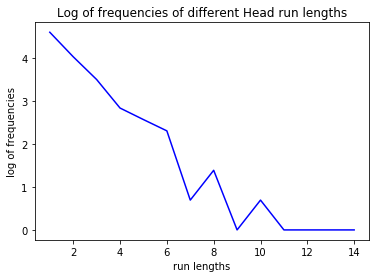

In [84]:
logfrequencies = []
import math
for x in frequencies:
    if x == 0:
        logfrequencies.append(x)
    else:
        logfrequencies.append(math.log(x))

plt.figure()
plt.plot(runs, logfrequencies,"b")
plt.xlabel("run lengths")
plt.ylabel("log of frequencies")
plt.title("Log of frequencies of different Head run lengths")

### Assignment 5

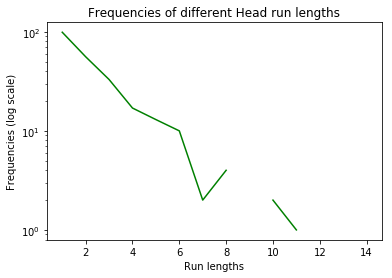

In [83]:
plt.figure()
plt.semilogy(runs, frequencies, "g")
plt.xlabel("Run lengths")
plt.ylabel("Frequencies (log scale)")
plt.title("Frequencies of different Head run lengths")

### Assignment 6

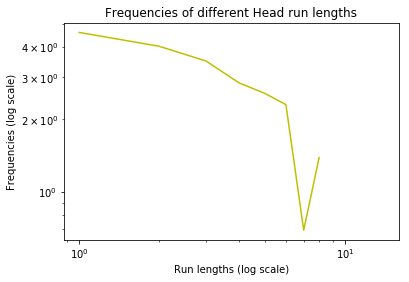

In [90]:
plt.figure()
plt.loglog(runs, logfrequencies, "y")
plt.xlabel("Run lengths (log scale)")
plt.ylabel("Frequencies (log scale)")
plt.title("Frequencies of different Head run lengths")